## ETS DECOMPOSITION FOR TIMESERIES GITHUB ## 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pandas_profiling


In [3]:
airtravel= pd.read_csv('C:/Users/aroyl/Desktop/Datasets/airline_passengers.csv', index_col='Month')
airtravel.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


First, let's look at the dataframe's details.
Using the .info() we get a basic understanding of the number of columns and what they contain. 
We did notice that initially, when we had not set the index column, it as just a generic column giving the index. 
So we returned to the import line of code and set the definition for the index column. 

After that, we pip install pandas-profiling.
And that helps us to get the detailed profile and visualization of the dataframe.

In [4]:
airtravel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [5]:
pandas_profiling.ProfileReport(airtravel)

The Profile report shows that there are two missing values for one of the columns and this will interfere with out analytics and particularly we cannot use parse_dates=True. 

We also notice that the Index column is not in Datetime. 

To fix that, we first drop the rows with the missing values using Dropna=True and then set the datetime format for our index.
We then verify the format and we do see that the Month column includes the first day of the month in YYYY-MM-DD format. 

In [6]:
airtravel.dropna(inplace=True)
airtravel.index = pd.to_datetime(airtravel.index)
airtravel.head()

,Thousands_of_Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


#####  6) ERROR TREND AND SEASONALITY MODEL using Statsmodels

This Model actually helps us to extract the Trends, the Seasonality and the Residual errors that can neither be explained by the trends nor by the seasonability parts. It is useful for deeper analysis as although the regular Observed Plot does not reveal how equal is the seasonality and how varying is the trend. 

There are two models: Multiplicative and Additive. It is advised to try out both in order to understand the differences. 


When the Additive model is selected, y(t) = Level + Trend + Seasonality + Noise

When the Multiplicative model is selected, y(t) = Level * Trend * Seasonality * Noise

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airtravel['Thousands_of_Passengers'], model='multiplicative')

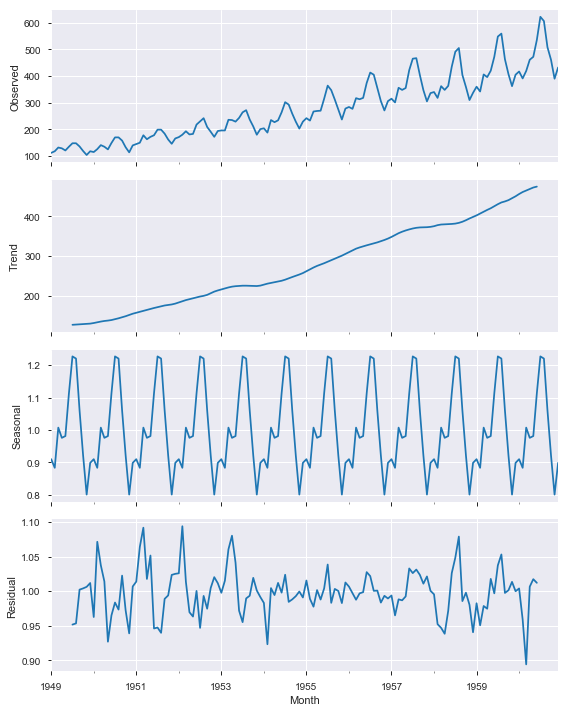

In [8]:
# Note that importing rcParams helps to increase the plotsize which otherwise is small. 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 10

fig = result.plot()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airtravel['Thousands_of_Passengers'], model='additive')

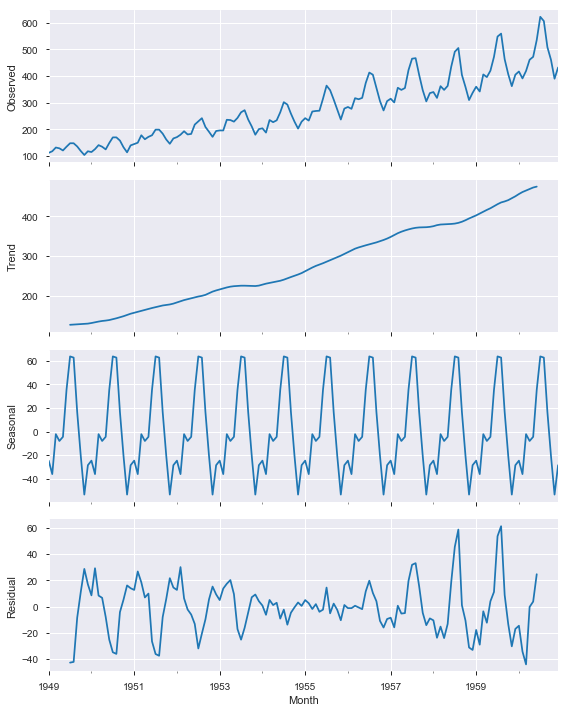

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 10
fig = result.plot()

We do notice that the two plots are identical and it does appear that the number of passengers has grown in an additive fashion. 

Thanks